### The Starcraft Player Performance Analysis and Ranking Prediction

# Project Overview

This project aims to analyze the performance of Starcraft players using a comprehensive dataset, containing detailed information about their basic demographic and in-game statistics.

# Introduction

Starcraft is a popular real-time strategy game known for its competitive gameplay, and studying player in-game statistics can provide valuable insights into technical strategies, skill levels, and factors influencing ranking.

The analysis of player in-game statistics in Starcraft can have various applications, such as guiding aspiring players to improve their skills, assisting coaches in devising effective training programs, strategic planning, and providing insights to game developers for balancing gameplay mechanics. Furthermore, understanding the dynamics of player performance in a competitive gaming environment like Starcraft can contribute to the broader field of esports analytics and enhance our understanding of the factors that drive success in professional gaming especially in e-sport league.

# Abstract

This project presents an analysis of in-game statistics in Starcraft and the development of predictive models for ranking prediction. Machine learning algorithms, including KNNClassifier, Logistic Regression, Support Vector Machine, and Random Forest Classifier, were employed to accurately predict player rankings based on comprehensive performance data. The models achieved an accuracy of approximately 43% in classifying player rankings and demonstrated a strong NDCG score of 0.988, indicating their effectiveness in ranking players. These findings offer valuable insights into the relationship of in-game statistics and league index, guiding strategic decision-making and contributing to the development of fair and competitive gameplay environments in Starcraft.

## Data Description

The dataset used in this project consists of various features capturing the performance and statistics of Starcraft players. Here are the description of 20 features included in the dataset:

1. GameID: Unique ID number for each game
2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8
3. Age: Age of each player
4. HoursPerWeek: Reported hours spent playing per week 
5. TotalHours: Reported total hours spent playing 
6. APM: Action per minute
7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp
8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp
9. UniqueHotkeys: Number of unique hotkeys used per timestamp 
10. MinimapAttacks: Number of attack actions on minimap per timestamp 
11. MinimapRightClicks: number of right-clicks on minimap per timestamp
12. NumberOfPACs: Number of PACs per timestamp 
13. GapBetweenPACs: Mean duration in milliseconds between PACs
14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds
15. ActionsInPAC: Mean number of actions within each PAC 
16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp
17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp
18. UniqueUnitsMade: Unique unites made per timestamp
19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp
20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp

Data preprocessing steps included handling missing values, imputation, and scaling numerical features. Exploratory data analysis (EDA) was performed to gain insights into the distribution of variables and identify any patterns or correlations.  


# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For '?' or null values imputation based on distribution
from sklearn.impute import KNNImputer

# Modelling pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# Metrics
from sklearn.metrics import ndcg_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer



In [2]:
%matplotlib inline

plt.rcParams
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
starcraft = pd.read_csv('data/starcraft_player_data.csv')

In [4]:
starcraft.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [5]:
# Making sure that there is no duplication of data
starcraft['GameID'].nunique()

3395

In [6]:
# Making sure that the number of features is as described
starcraft.shape

(3395, 20)

In [7]:
starcraft.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


From this summary, the features (Age, HoursPerWeek, and TotalHours) are missing. Technically, they should be within this numerical summary because they are numerical.  

In [8]:
starcraft.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

Here the columns (Age, HoursPerWeek, and TotalHours) are not integer, but their values are numbers as shown above.  

In [9]:
starcraft.isnull().any()

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

In [10]:
starcraft[['Age', 'HoursPerWeek', 'TotalHours']].value_counts()

Age  HoursPerWeek  TotalHours
?    ?             ?             55
22   6             400            8
19   12            500            8
20   10            700            7
24   20            1000           7
                                 ..
21   24            150            1
                   1460           1
17   4             300            1
                   350            1
16   0             365            1
Length: 2298, dtype: int64

From the value counts, some values are input as '?' and three columns share 2298 rows in an equal amount of frequency.  

In [11]:
for column in ['Age', 'HoursPerWeek', 'TotalHours']:
    print(len(starcraft[starcraft[column] == '?']))

55
56
57


However, their number of '?' values are not equal. Let's do some further analysis and imputation on these values.  

# Missing value Analysis

In [12]:
starcraft_imputed = starcraft.copy()

In [13]:
column_name = starcraft.columns

In [14]:
# change '?' into null value for consistency format
starcraft_imputed.replace('?', np.nan, inplace = True)

In [15]:
import missingno as msno

In [16]:
# Changing the columns into numerical for analysis
for column in ['Age', 'HoursPerWeek', 'TotalHours']:
    starcraft_imputed[column] = pd.to_numeric(starcraft_imputed[column], errors='coerce')

<AxesSubplot:>

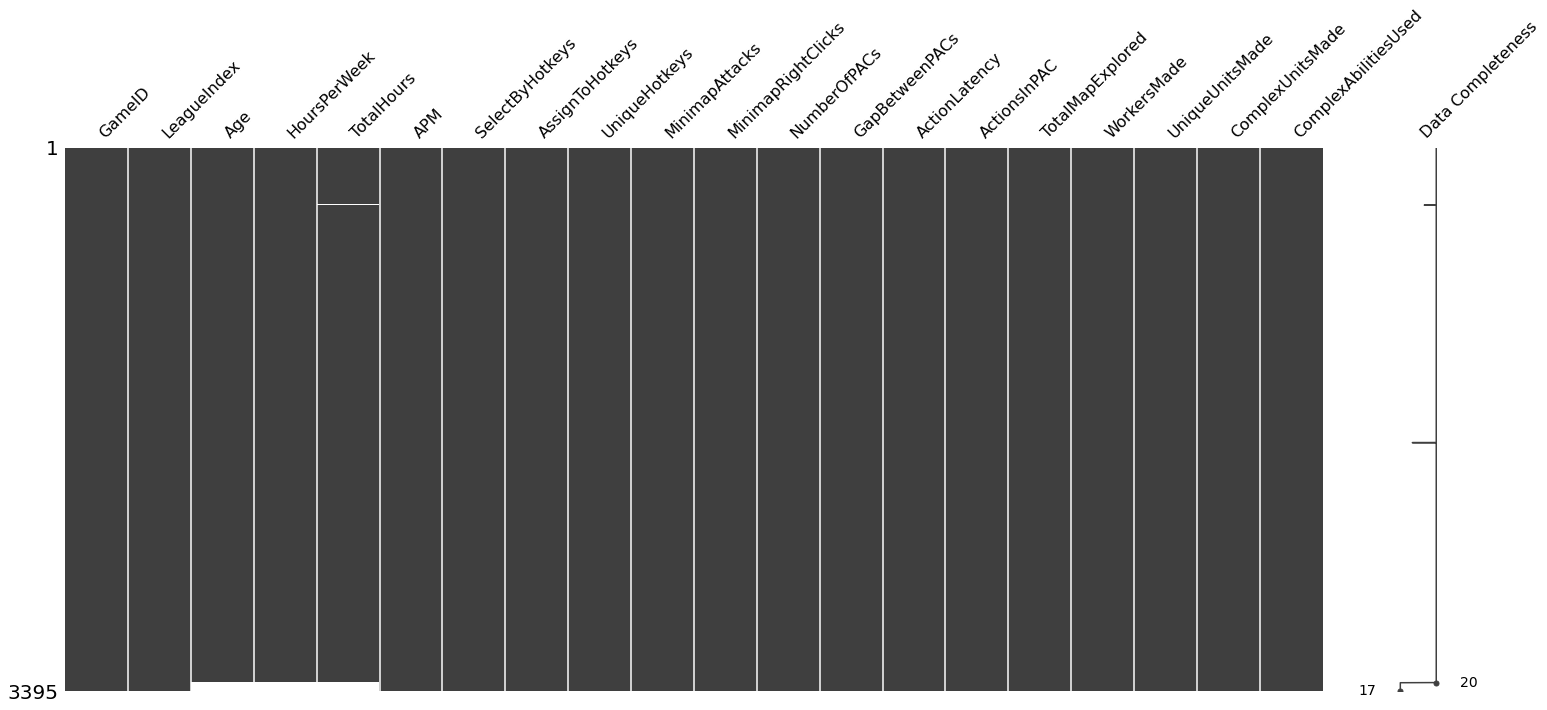

In [17]:
msno.matrix(starcraft_imputed, labels = True)

In [18]:
starcraft_imputed[starcraft_imputed['Age'].isna()]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3340,10001,8,NaN,NaN,NaN,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,NaN,NaN,NaN,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,NaN,NaN,NaN,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,NaN,NaN,NaN,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,NaN,NaN,NaN,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,NaN,NaN,NaN,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,NaN,NaN,NaN,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,NaN,NaN,NaN,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000
3348,10022,8,NaN,NaN,NaN,210.5088,0.007974,0.000867,7,0.000548,0.000638,0.006518,15.7856,30.7156,4.8058,34,0.000817,6,0.000000,0.000000
3349,10023,8,NaN,NaN,NaN,248.0118,0.014722,0.001752,7,0.000375,0.000110,0.004115,17.4656,34.2357,7.8973,20,0.001111,8,0.000000,0.000000


In [19]:
starcraft_imputed.loc[starcraft_imputed['TotalHours'].isna()].head(10)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17.0,20.0,NaN,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18.0,NaN,NaN,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,NaN,NaN,NaN,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,NaN,NaN,NaN,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,NaN,NaN,NaN,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,NaN,NaN,NaN,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,NaN,NaN,NaN,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,NaN,NaN,NaN,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,NaN,NaN,NaN,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,NaN,NaN,NaN,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000


In [20]:
starcraft_imputed.loc[starcraft_imputed['LeagueIndex'] == 8].head(10)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3340,10001,8,NaN,NaN,NaN,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,NaN,NaN,NaN,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,NaN,NaN,NaN,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,NaN,NaN,NaN,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,NaN,NaN,NaN,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,NaN,NaN,NaN,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,NaN,NaN,NaN,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,NaN,NaN,NaN,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000
3348,10022,8,NaN,NaN,NaN,210.5088,0.007974,0.000867,7,0.000548,0.000638,0.006518,15.7856,30.7156,4.8058,34,0.000817,6,0.000000,0.000000
3349,10023,8,NaN,NaN,NaN,248.0118,0.014722,0.001752,7,0.000375,0.000110,0.004115,17.4656,34.2357,7.8973,20,0.001111,8,0.000000,0.000000


From above information, they share 55 rows with null values. Besides, all null values have a LeagueIndex of 8. From this inspection, there could be the company is hiding demographic information and training information for player's privacy.  

In [21]:
# Distributing the null values into 8 groups based on the number of LeagueIndex
imputer = KNNImputer(n_neighbors=8)
starcraft_imputed = imputer.fit_transform(starcraft_imputed)

In [22]:
starcraft_imputed = pd.DataFrame(starcraft_imputed, columns = column_name)

In [23]:
starcraft_imputed.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.630118,15.985420,957.939580,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,4.174462,11.878802,17172.108542,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


From here, the HoursPerWeek and TotalHours are unexpectedly large. The number of time spent in gaming is almost the entire time, this is illogical as gaming time should not be overwhelem and players should spend some time to rest and live their life.  

In [24]:
starcraft_imputed.dtypes

GameID                  float64
LeagueIndex             float64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys           float64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored        float64
WorkersMade             float64
UniqueUnitsMade         float64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

# Visualization

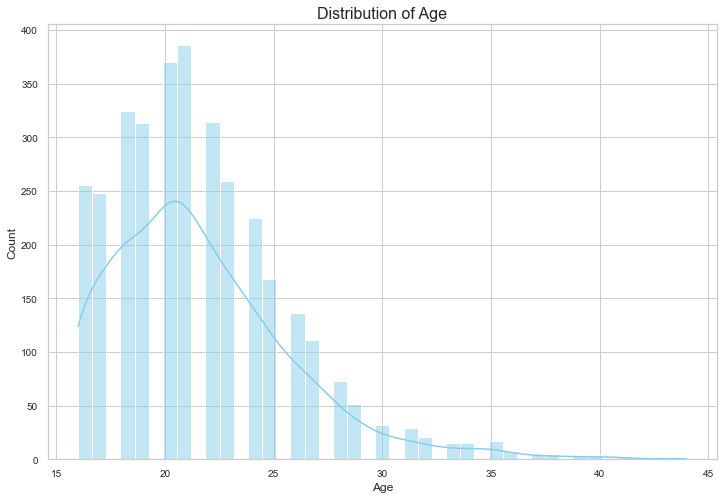

In [25]:
sns.set(style='whitegrid', palette='pastel')

sns.histplot(starcraft_imputed['Age'], kde=True, color='skyblue')

plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

The age distribution of players showing a right skew distribution, this shows that there are higher number of younger generation playing Starcraft.  

In [26]:
def create_scatterplot(x, y):
    sns.set(style='ticks', font_scale=1.2)

    sns.scatterplot(x=x, y=y, 
                hue = 'LeagueIndex', data=starcraft_imputed)
    plt.title(f'Scatter Plot of {y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    sns.despine(trim=True)

    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

    plt.tight_layout()
    plt.show()

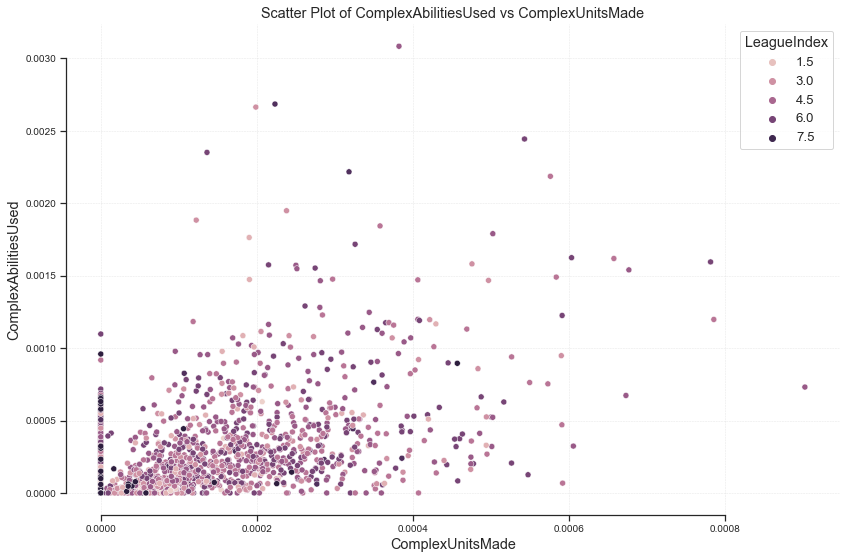

In [27]:
# ComplexUnitsMade, ComplexAbilitiesUsed
create_scatterplot('ComplexUnitsMade', 'ComplexAbilitiesUsed')

From the plot above, the dots are distributed everywhere and there is no evident relationship from ComplexUnitsMade and ComplexAbilitiesUsed in getting high rank.  

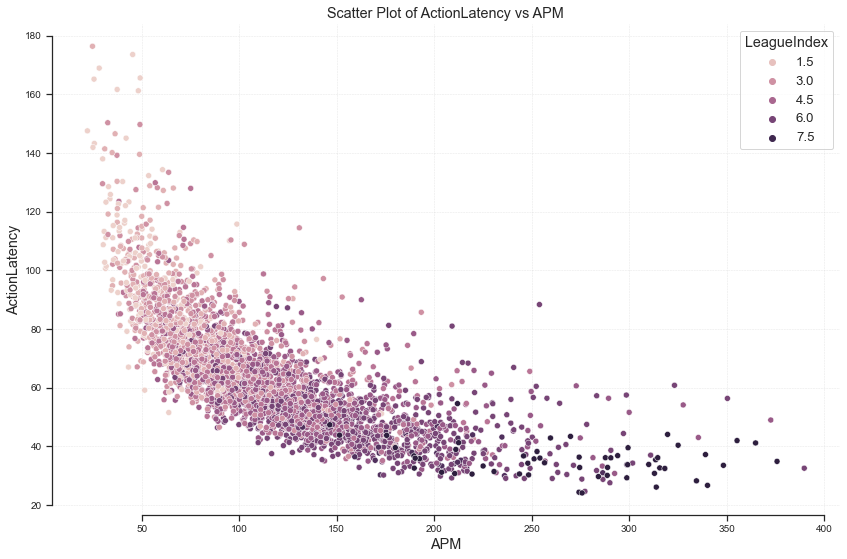

In [28]:
# ActionLatency, APM
create_scatterplot('APM', 'ActionLatency')

From this plot, there is an inverse relationship between ActionLatency and APM, besides, the higher the APM, the higher the LeagueIndex. It indicates the effectiveness of an action towards the gaming strategy.  

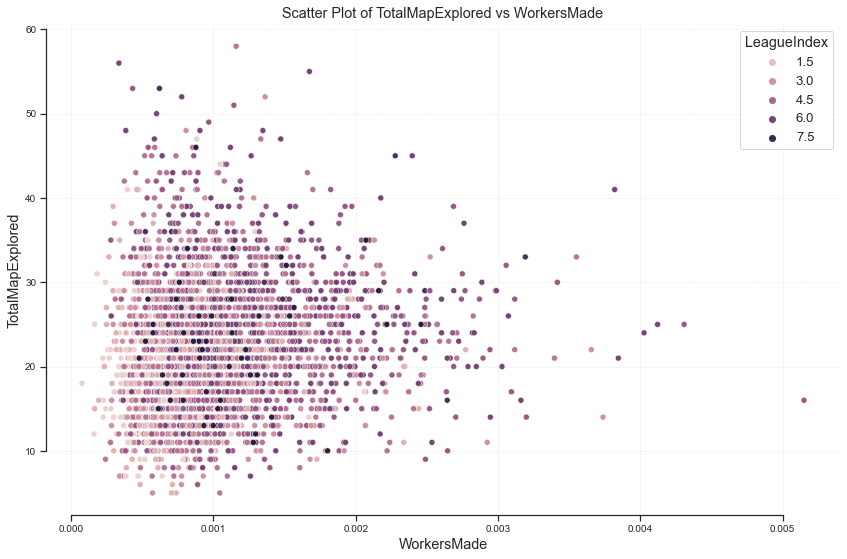

In [29]:
# TotalMapExplored, WorkersMade
create_scatterplot('WorkersMade', 'TotalMapExplored')

From this plot, there is no direct relationship between the number of WorkersMade and TotalMapExplored, it indicates the WorkersMade may not be effectively used throughout the gaming process.  

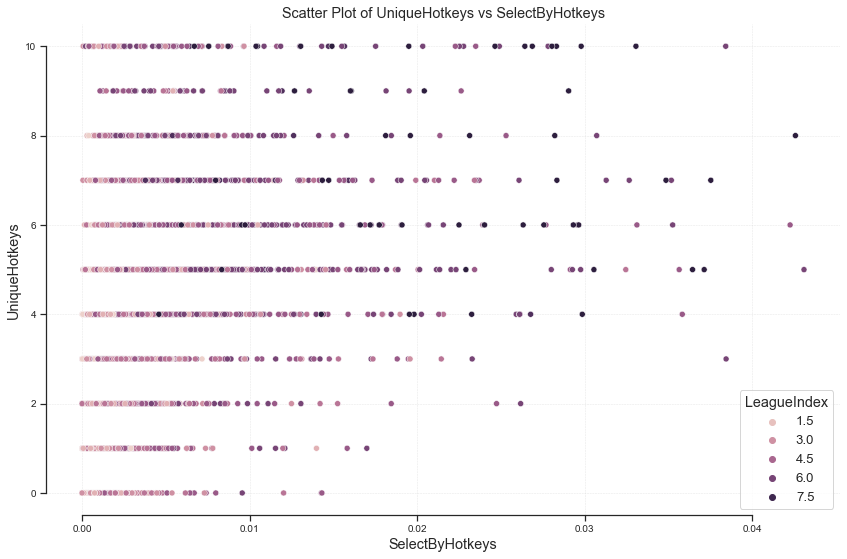

In [30]:
# SelectByHotkeys, UniqueHotkeys
create_scatterplot('SelectByHotkeys', 'UniqueHotkeys')

From this plot, there is no evident relationship between the UniqueHotkeys and SelectByHotkeys, it shows different players may have different strategy in achieving high rank with their Hotkeys assignment. 

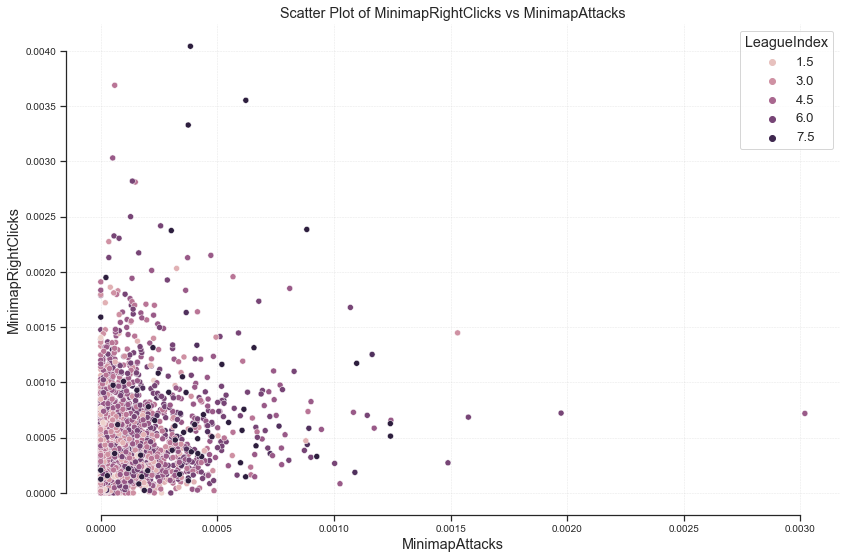

In [31]:
# MinimapAttacks, MinimapRightClicks
create_scatterplot('MinimapAttacks', 'MinimapRightClicks')

It seems the MinimapRightClicks have a slight inverse relationship with MinimapAttacks. It indicates the effectiveness of using MinimapRightClicks in launching attacks in minimap tends towards accuracy rathen than frequency.  

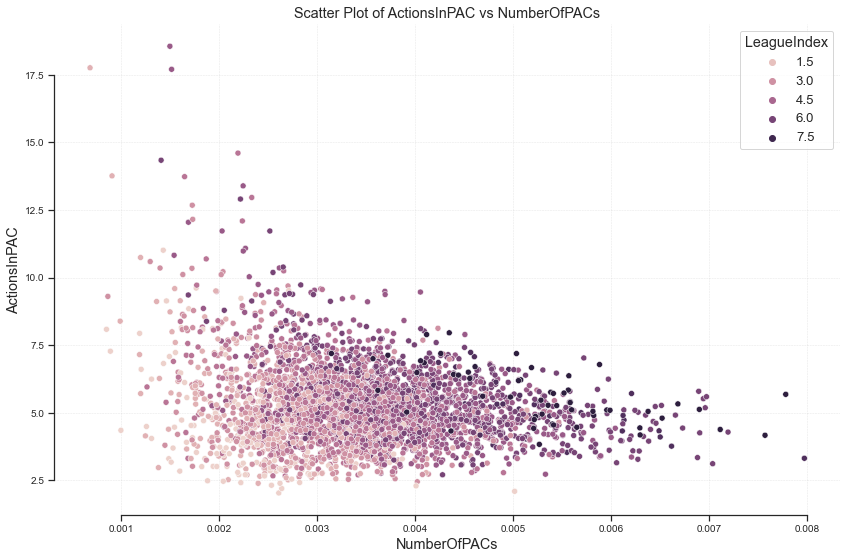

In [32]:
# NumberOfPACs, ActionsInPAC
create_scatterplot('NumberOfPACs', 'ActionsInPAC')

There is a inverse relationship between ActionsInPAC and NumberOfPACs, besides higher rank players tends to have higher NumberOfPACs and lower ActionsInPAC, similarly it indicates the effectiveness of ActionsInPAC used in gaming.  

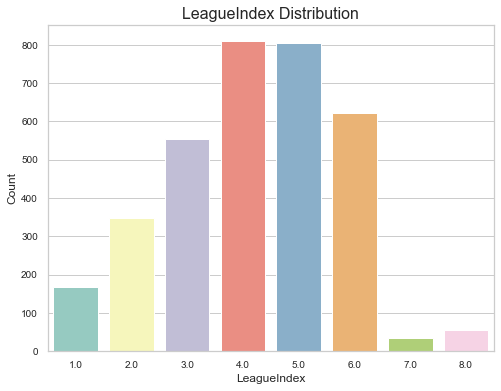

In [33]:
sns.set(style='whitegrid', palette='Set3')

plt.figure(figsize=(8, 6))
sns.countplot(data=starcraft_imputed, x='LeagueIndex', palette='Set3')

plt.title('LeagueIndex Distribution', fontsize=16)
plt.xlabel('LeagueIndex', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

The LeagueIndex Distribution showing a higher number of players ranked between 4-6 showing most players are achieving a moderate level of skills. Besides, a higher number of rank 8 than rank 7 could be because of the imputation.  

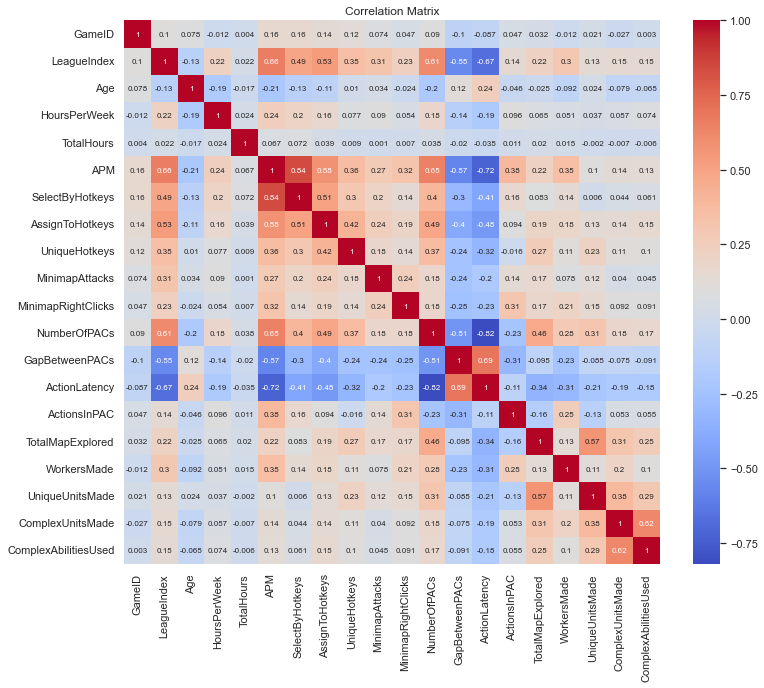

In [34]:
corr_matrix = starcraft_imputed.corr().round(3)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 8})
plt.title('Correlation Matrix')
plt.show()

From the big picture, there is no feature that share a high correlation with each other, from here, the baseline model is created for more investigation.  

## Methodology and Algorithms

The project employed a supervised learning approach using classification algorithms. Several models were considered, including KNN Classifier, Logistic Regression, Random Forest, and Support Vector Machines. Cross-validation was used to estimate model performance, and hyperparameter tuning was performed to optimize the models.


## Experimental Design and Evaluation

The dataset was split into a training set (80%) and a test set (20%) to train and evaluate the models. Performance metrics such as accuracy, precision, recall, and F1-score were used to assess model classification performance and ncdg score is used for ranking performance.


In [35]:
# Model evaluation
def evaluate_model(data, model):
    X = data.drop('LeagueIndex', axis=1)
    y = data['LeagueIndex']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovo")
    ndcg = ndcg_score(y_test.values.reshape(1, -1), y_pred.reshape(1, -1))
    
    metrics = {
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1],
    "ROC AUC Score": [roc_auc],
    "NDCG Score": [ndcg]
    }

    metrics_df = pd.DataFrame(metrics)
    print("Evaluation Metrics:")
    print(metrics_df)
    
    
    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)

### Baseline model

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=8)  

evaluate_model(starcraft_imputed, knn_model)

Evaluation Metrics:
   Accuracy  Precision    Recall  F1 Score  ROC AUC Score  NDCG Score
0  0.303387   0.463011  0.329033  0.332144       0.709668    0.973734
Confusion Matrix:
[[ 5  8  8  6  4  0  0  0]
 [ 6 24 22 19  7  2  0  0]
 [ 4 20 22 37 16 13  0  0]
 [ 5 19 26 61 42 14  0  0]
 [ 2  4 17 52 49 34  0  0]
 [ 0  1 10 24 47 35  0  0]
 [ 0  0  1  0  2  1  0  0]
 [ 0  0  0  0  0  0  0 10]]


In this baseline model, KNNClassifier is used to classify each element to its nearest neighbors out of the 8 neighbors distributed in the entire dataset. The accuracy rate is 30.34%, however the ROC AUC Score is 70.96%, which means the true positive rate vs true negative rate is high. Regarding on the ranking performance, the NDCG Score is 97.37%, which means the KNNClassifier is good for ranking prediction.  

### Modeling Improvement

In [37]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

evaluate_model(starcraft_imputed, rfc)

feature_importance = rfc.feature_importances_

column_name = starcraft_imputed.drop('LeagueIndex', axis=1).columns

feature_importance_dict = {
    "Feature": column_name,
    "Importance": feature_importance
}

feature_importance_df = pd.DataFrame(feature_importance_dict)
sorted_feature_importance = feature_importance_df.sort_values(by="Importance", ascending=False)

print("Feature Importance (Sorted):")
print(sorted_feature_importance)

Evaluation Metrics:
   Accuracy  Precision    Recall  F1 Score  ROC AUC Score  NDCG Score
0  0.430044   0.583492  0.434154  0.442891       0.859675     0.98779
Confusion Matrix:
[[12  7  6  6  0  0  0  0]
 [ 6 25 29 20  0  0  0  0]
 [ 4 10 34 47 17  0  0  0]
 [ 2  7 31 67 52  8  0  0]
 [ 0  4  4 44 73 33  0  0]
 [ 0  0  0 13 33 71  0  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0 10]]
Feature Importance (Sorted):
                 Feature  Importance
12         ActionLatency    0.092248
4                    APM    0.081962
3             TotalHours    0.068992
5        SelectByHotkeys    0.066578
11        GapBetweenPACs    0.064566
10          NumberOfPACs    0.064441
0                 GameID    0.063200
6        AssignToHotkeys    0.062065
15           WorkersMade    0.057958
8         MinimapAttacks    0.050951
13          ActionsInPAC    0.048418
9     MinimapRightClicks    0.048264
14      TotalMapExplored    0.040658
2           HoursPerWeek    0.039465
1                    

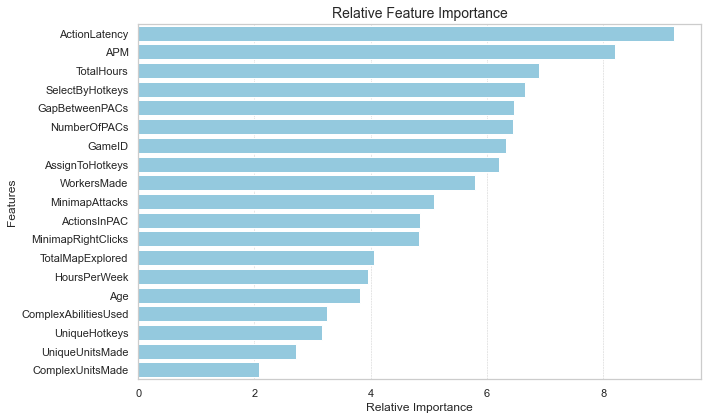

In [38]:
# Sort feature importance values in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance_values = feature_importance[sorted_indices]

# Calculate relative importance as a percentage
relative_importance = (sorted_importance_values / sorted_importance_values.sum()) * 100

# Get corresponding feature names
feature_names = column_name[sorted_indices]

# Plot relative feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=relative_importance, y=feature_names, color='skyblue')
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Relative Feature Importance', fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout() 
plt.show()

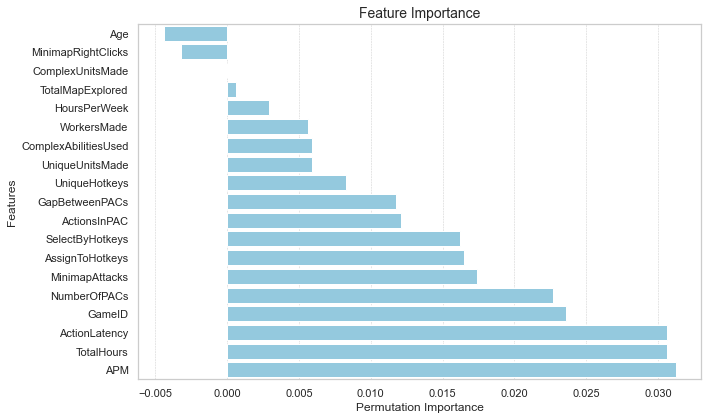

In [39]:
X = starcraft_imputed.drop('LeagueIndex', axis=1)
y = starcraft_imputed['LeagueIndex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate permutation importance
perm_importance = permutation_importance(rfc, X_test, y_test, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=perm_importance.importances_mean[sorted_idx], y=X.columns[sorted_idx], color='skyblue')
plt.xlabel("Permutation Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance", fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Random forest classifier is used for multiclass classification. It is a better model selected for the usage of classifying the elements without feature scaling. From this model, we can see the feature importance sorted in descending order showing the importance and relative importance of each feature contributing to the model performance. 

From the plots above, the top 5 features contributing the most to the model evaluations are NumberOfPACs, GameID, ActionLatency, TotalHours, and APM. More feature engineering will be carried out to select the better feature, for example GameID is supposedly to be unique identifier and not meaningful in ranking prediction. GameID behaves in having a higher feature importance only because the KNN Imputation earlier, where most of the LeagueIndex = 8 is classified to the GameID at the very end. 

## Feature Engineering

### Feature Selection

In [40]:
starcraft_engineered = starcraft_imputed.copy()

In [41]:
X_engineered, y_engineered = starcraft_engineered.drop('LeagueIndex', axis=1), starcraft_engineered['LeagueIndex']

X_train, X_test, y_train, y_test = train_test_split(X_engineered, y_engineered, test_size=0.2, random_state=42)

In [42]:
columns = ['GameID', 'ComplexUnitsMade', 'ComplexAbilitiesUsed',
          'SelectByHotkeys', 'GapBetweenPACs', 'AssignToHotkeys',
          'WorkersMade', 'MinimapAttacks', 'ActionsInPAC',
          'MinimapRightClicks', 'TotalMapExplored', 'HoursPerWeek',
          'Age', 'ComplexAbilitiesUsed', 'UniqueHotkeys',
          'UniqueUnitsMade', 'ComplexUnitsMade']

features_to_remove = []
model_accuracy = []
model_ndcg = []
model_roc = []

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
accuracy = accuracy_score(y_test, rfc.predict(X_test))
roc_auc = roc_auc_score(y_test, rfc.predict_proba(X_test)
, multi_class="ovo")
ndcg = ndcg_score(y_test.values.reshape(1, -1), rfc.predict(X_test).reshape(1, -1))

features_to_remove.append('None')
model_accuracy.append(accuracy)
model_roc.append(roc_auc)
model_ndcg.append(ndcg)

# Loop through the features and evaluate accuracy after removing each feature
for feature in columns:
    X_train_reduced = X_train.drop(feature, axis=1)
    X_test_reduced = X_test.drop(feature, axis=1)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_reduced, y_train)
    reduced_accuracy = accuracy_score(y_test, model.predict(X_test_reduced))
    reduced_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_reduced)
, multi_class="ovo")
    reduced_ndcg = ndcg_score(y_test.values.reshape(1, -1), model.predict(X_test_reduced).reshape(1, -1))
  
    features_to_remove.append(feature)
    model_accuracy.append(reduced_accuracy)
    model_roc.append(reduced_roc_auc)
    model_ndcg.append(reduced_ndcg)
    

feature_accuracy = pd.DataFrame({'Feature': features_to_remove,
                                 'Accuracy': model_accuracy,
                                 'ROC': model_roc,
                                 'NDCG': model_ndcg})

feature_accuracy



,Feature,Accuracy,ROC,NDCG
0,None,0.430044,0.859675,0.987790
1,GameID,0.425626,0.837502,0.987270
2,ComplexUnitsMade,0.415317,0.853926,0.987135
3,ComplexAbilitiesUsed,0.416789,0.858036,0.987166
4,SelectByHotkeys,0.412371,0.855469,0.987363
5,GapBetweenPACs,0.424153,0.857815,0.987253
6,AssignToHotkeys,0.399116,0.860715,0.987175
7,WorkersMade,0.412371,0.867114,0.986315
8,MinimapAttacks,0.409426,0.836693,0.987180
9,ActionsInPAC,0.403535,0.852131,0.987118


From the dataframe above, the accuracy and NDCG score are used to test the model evaluation would be affected if a feature is dropped. The features that do not contribute much for the evaluation are GameID and GapBetweenPACs.  

In [43]:
columns = ['GameID', 'GapBetweenPACs']
starcraft_engineered = starcraft_engineered.drop(columns, axis=1)

### Feature Analysis

Now, polynomial features would be used to detect if some features would contribute a higher accuracy value to the model evaluation if they are have interaction and raised to a higher degree.  

In [44]:
X_engineered, y_engineered = starcraft_engineered.drop('LeagueIndex', axis=1), starcraft_engineered['LeagueIndex']

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_engineered)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_engineered, test_size=0.2, random_state=42)

In [46]:
best_accuracy = 0.0
best_degree = 0
best_interaction_only = False

for degree in range(1, 4):  # Test degrees from 1 to 3
    for interaction_only in [False, True]:  # Test both True and False for interaction_only
        # Initialize the PolynomialFeatures transformer
        poly_features = PolynomialFeatures(degree=degree, interaction_only=interaction_only)
        
        # Transform the features to polynomial and interaction features
        X_poly = poly_features.fit_transform(X_scaled)
        
        # Create a classifier (e.g., Logistic Regression)
        classifier = RandomForestClassifier(n_estimators=100, random_state=42)

        # Perform cross-validation and calculate the mean accuracy score
        cv_scores = cross_val_score(classifier, X_poly, y, cv=5, scoring='accuracy')
        mean_accuracy = cv_scores.mean()
        
        # Check if the current combination is better than the previous best
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_degree = degree
            best_interaction_only = interaction_only

# Print the best degree and interaction_only values
print("Best Degree:", best_degree)
print("Best Interaction Only:", best_interaction_only)

Best Degree: 1
Best Interaction Only: False


From the above result, the best degree power of each features is its original power and there is no interaction between each features.

### Other Model Evaluation

In [47]:
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=1000)  # OvR strategy
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_ndcg = ndcg_score(y_test.values.reshape(1, -1), logistic_predictions.reshape(1, -1))

print("Logistic Regression Accuracy:", logistic_accuracy)
print("NDCG Score:", logistic_ndcg)


Logistic Regression Accuracy: 0.36229749631811486
NDCG Score: 0.9768792730063891


In [48]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_ndcg = ndcg_score(y_test.values.reshape(1, -1), svm_predictions.reshape(1, -1))

print("Support Vector Machine Accuracy:", svm_accuracy)
print("NDCG Score:", svm_ndcg)

Support Vector Machine Accuracy: 0.374079528718704
NDCG Score: 0.9833987691487694


In [49]:
knn_model = KNeighborsClassifier(n_neighbors=8)  
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_ndcg = ndcg_score(y_test.values.reshape(1, -1), knn_predictions.reshape(1, -1))

print("Logistic Regression Accuracy:", knn_accuracy)
print("NDCG Score:", knn_ndcg)

Logistic Regression Accuracy: 0.3475699558173785
NDCG Score: 0.9759535766508657


### Ensemble Method

In [50]:
# Bagging
bagging_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

# AdaBoost
adaboost_classifier = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Gradient Boosting
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)

# Evaluate Bagging Classifier
bagging_predictions = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
bagging_report = classification_report(y_test, bagging_predictions)
bagging_ndcg = ndcg_score(y_test.values.reshape(1, -1), bagging_predictions.reshape(1, -1))
print("Bagging Classifier Accuracy:", bagging_accuracy)
print("Bagging Classifier Report:\n", bagging_report)
print("NDCG Score:", bagging_ndcg)



# Evaluate AdaBoost Classifier
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_report = classification_report(y_test, adaboost_predictions)
adaboost_ndcg = ndcg_score(y_test.values.reshape(1, -1), adaboost_predictions.reshape(1, -1))
print("AdaBoost Classifier Accuracy:", adaboost_accuracy)
print("AdaBoost Classifier Report:\n", adaboost_report)
print("NDCG Score:", adaboost_ndcg)

# Evaluate Gradient Boosting Classifier
gradient_boosting_predictions = gradient_boosting_classifier.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
gradient_boosting_report = classification_report(y_test, gradient_boosting_predictions)
gradient_ndcg = ndcg_score(y_test.values.reshape(1, -1), gradient_boosting_predictions.reshape(1, -1))
print("Gradient Boosting Classifier Accuracy:", gradient_boosting_accuracy)
print("Gradient Boosting Classifier Report:\n", gradient_boosting_report)
print("NDCG Score:", gradient_ndcg)


Bagging Classifier Accuracy: 0.4167893961708395
Bagging Classifier Report:
               precision    recall  f1-score   support

         1.0       0.46      0.42      0.44        31
         2.0       0.45      0.28      0.34        80
         3.0       0.35      0.30      0.33       112
         4.0       0.35      0.43      0.39       167
         5.0       0.36      0.39      0.37       158
         6.0       0.57      0.62      0.59       117
         7.0       0.00      0.00      0.00         4
         8.0       1.00      1.00      1.00        10

    accuracy                           0.42       679
   macro avg       0.44      0.43      0.43       679
weighted avg       0.42      0.42      0.41       679

NDCG Score: 0.9877256044679478
AdaBoost Classifier Accuracy: 0.42857142857142855
AdaBoost Classifier Report:
               precision    recall  f1-score   support

         1.0       0.48      0.42      0.45        31
         2.0       0.44      0.30      0.36        80


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metr

In [51]:
# Train a RankNet model (MLPRegressor can be used as a simple example)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_classifier.fit(X_train, y_train.values)

# Make predictions on the test set
mlp_y_pred = mlp_classifier.predict(X_test)

# Evaluate using NDCG metric
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_ndcg = ndcg_score(y_test.values.reshape(1, -1), mlp_y_pred.reshape(1, -1))

print("MLP Classifier Accuracy:", mlp_accuracy)
print("NDCG:", mlp_ndcg)

MLP Classifier Accuracy: 0.3917525773195876
NDCG: 0.9831469185047889


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
#pip install xgboost

In [53]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

params = {
    'objective': 'rank:pairwise',
    'eval_metric': 'ndcg@5',
    'eta': 0.1,
    'max_depth': 3,
    'gamma': 1.0,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 0.1,
    'alpha': 0.1,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Calculate NDCG score on the test set
ndcg_score_xgb = ndcg_score(y_test.values.reshape(1, -1), y_pred.reshape(1, -1))
print("NDCG score: ", ndcg_score_xgb)

NDCG score:  0.9891773649356996


From the above models, the best model option is Random Forest Classifier, even though some models provide a better NDCG score for ranking prediction, but averagely comparing to the computational efficiency, Random Forest Classifier is better out of all the models tested.  

### Hyperparameter Tuning

In [54]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rfc = grid_search.best_estimator_

print("Best Hyperparameters:")
print(best_params)

cv_scores = cross_val_score(best_rfc, X, y, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Scores:
[0.43298969 0.45802651 0.42268041 0.41237113 0.35787923]


In [55]:
starcraft_best = starcraft_imputed.copy()

columns = ['GameID', 'GapBetweenPACs']
starcraft_engineered = starcraft_best.drop(columns, axis=1)

X_best, y_best = starcraft_best.drop('LeagueIndex', axis=1), starcraft_best['LeagueIndex']

X_train, X_test, y_train, y_test = train_test_split(X_best, y_best, test_size=0.2, random_state=42)

best_rfc = RandomForestClassifier(max_depth= None,
                                  min_samples_leaf= 1,
                                  min_samples_split= 2,
                                  n_estimators= 200,
                                  random_state=42)

best_rfc.fit(X_train, y_train)
best_accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
best_roc_auc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)
, multi_class="ovo")
best_ndcg = ndcg_score(y_test.values.reshape(1, -1), best_rfc.predict(X_test).reshape(1, -1))

print("Best accuracy:", best_accuracy)
print("Best ROC:", best_roc_auc)
print("NDCG Score:", best_ndcg)

Best accuracy: 0.4329896907216495
Best ROC: 0.8623841210576179
NDCG Score: 0.9876109974933293


From the hyperparameter tuning, cross validation score of 43.3% averagely is obtained with a 98.8% of NDCG score.  

## References and Citations
1. "StarCraft." StarCraft Official Website, Blizzard Entertainment, 2023, https://starcraft.com/en-us/.
2. "Dutta, Ankita. 'Demystifying NDCG.' Towards Data Science, Medium, 10 Nov. 2020, https://towardsdatascience.com/demystifying-ndcg-bee3be58cfe0."

## Conclusion and Future Work
The models achieved an average accuracy of 43% in predicting the league index and a 98.6% of NDCG Score. The Random Forest algorithm outperformed other models, and it is the best to be used for ranking prediction considering the computational and cost efficiency while also providing valuable insights into the most influential features. 

Future work could involve:
1. Exploring additional feature engineering techniques
- potentially create new variables based on the relevant features (ideally formulate the effectiveness of actions, attacks, and units made based on frequency of the variables)
2. Investigating other features such as:
- historical performance records (Win-Loss Ratio)
- match outcomes (ELO rating)
- tournament results
- expert judgement (referencing from coach or experienced players)
- player profiles (demographics)
- game mode (single player or multi-player, PvP vs PvC)

3. Identifying a clearer outlier boundary as the TotalHours and HoursPerWeek spent in gaming is illogically large.  
 
4. Incorporating external data sources
5. Implementing advanced ensemble methods

for further improving model performance.

Data collection could be collected via training over Artificial Intelligence players from several difficulty and task.  
